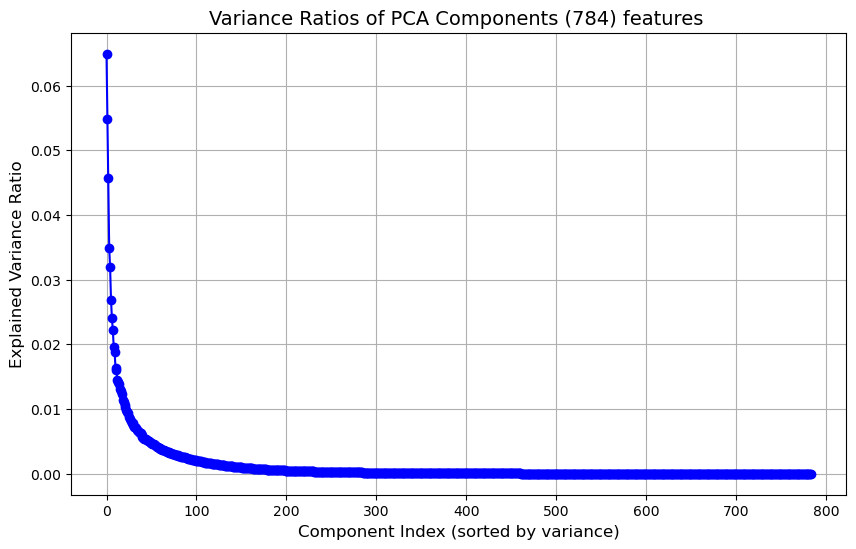

In [18]:
import pickle
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
with open('mnist_train.pkl', 'rb') as file:
    mnist_train = pickle.load(file)
train_images, train_labels = mnist_train
# Normalize pixel values to be between 0 and 1
train_images = train_images / 255.0
train_images_flat = train_images[:1000].reshape((1000,-1))

scaler = StandardScaler()
train_images_scaled = scaler.fit_transform(train_images_flat)
pca = PCA(n_components=784)
pca.fit(train_images_scaled)

explained_variance_ratios = pca.explained_variance_ratio_

sorted_variance_ratios = np.sort(explained_variance_ratios)[::-1]

#plot the figure
plt.figure(figsize=[10,6])
plt.plot(sorted_variance_ratios, marker='o', linestyle='-', color='b')
plt.title('Variance Ratios of PCA Components (784) features ', fontsize=14)
plt.xlabel('Component Index (sorted by variance)', fontsize = 12)
plt.ylabel('Explained Variance Ratio', fontsize = 12)
plt.grid(True)
plt.show()

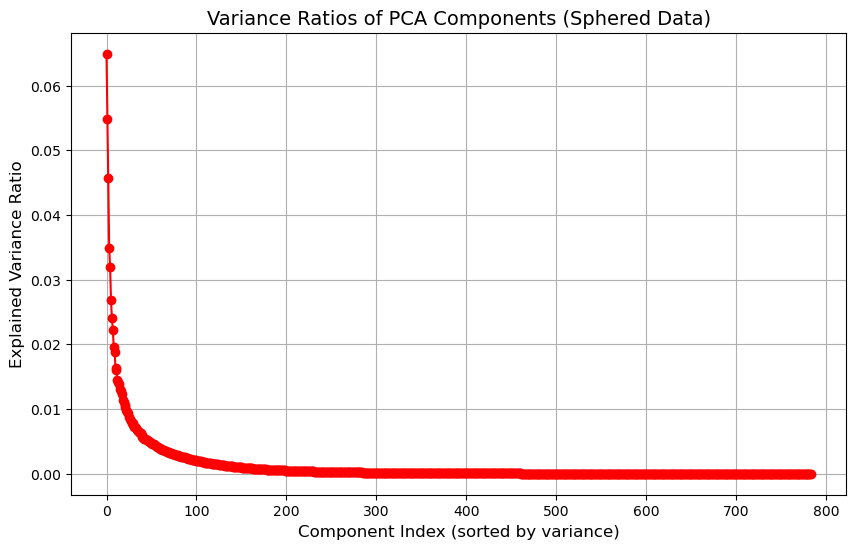

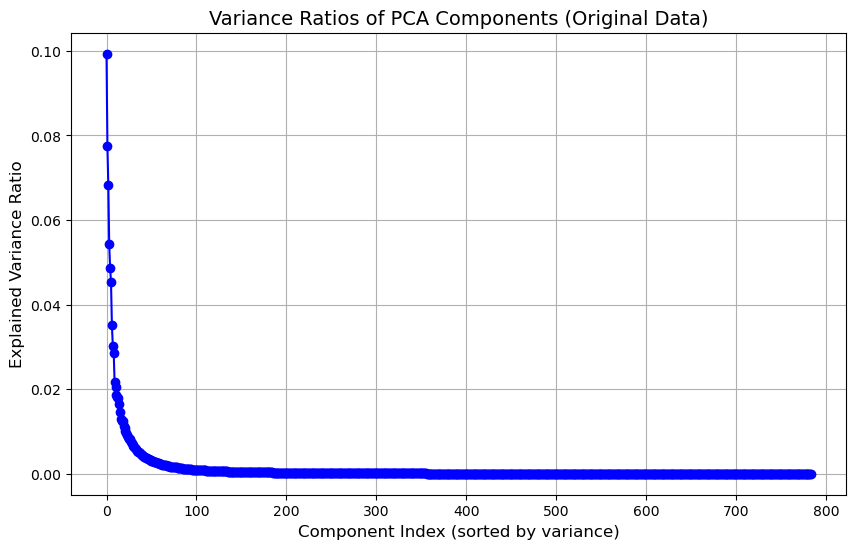

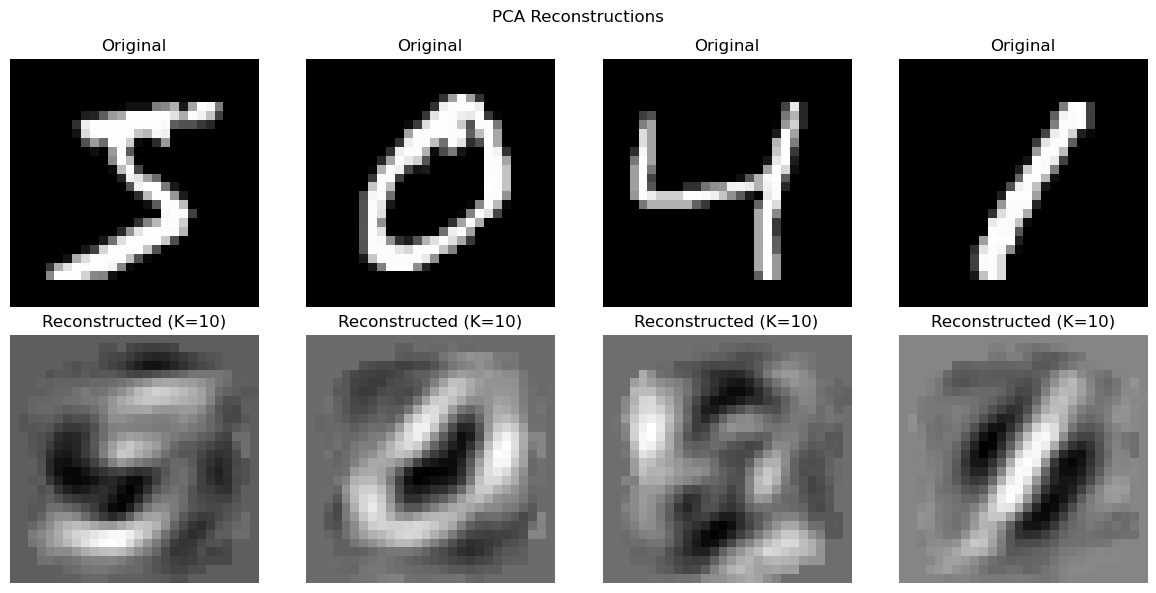

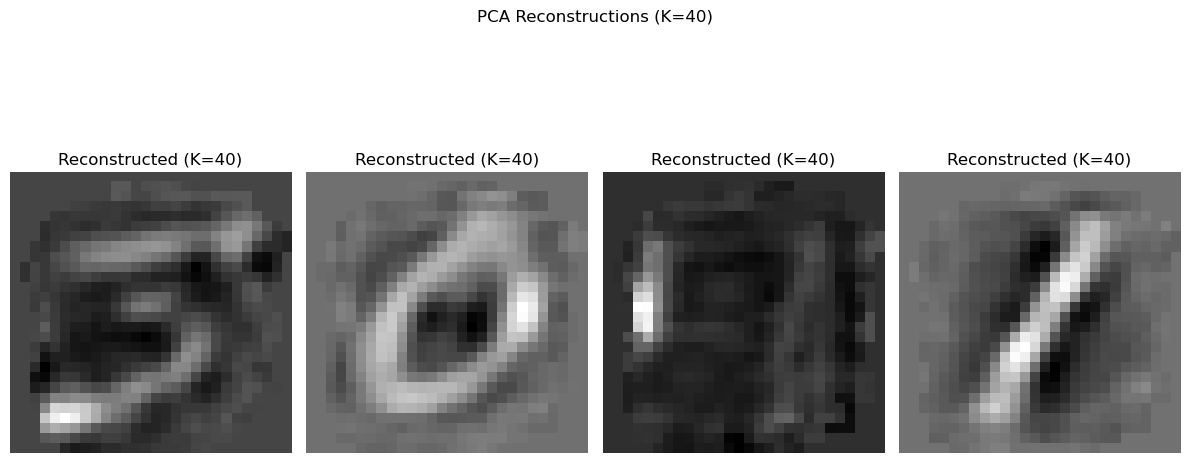

In [30]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#  Load MNIST data
with open('mnist_train.pkl', 'rb') as file:
    mnist_train = pickle.load(file)

train_images, train_labels = mnist_train

# Normalize pixel values to be between 0 and 1
train_images = train_images / 255.0

# Reshape the first 1000 images into (1000, 784)
train_images_flat = train_images[:1000].reshape((1000, -1))

# Sphering the data
scaler = StandardScaler(with_mean=True, with_std=True)  # Subtract mean and divide by std
train_images_sphered = scaler.fit_transform(train_images_flat)

#  Apply PCA
pca = PCA(n_components=784)
pca.fit(train_images_sphered)

# Variance Ratios
explained_variance_ratios_sphered = pca.explained_variance_ratio_

# Plot variance ratios for sphered data
sorted_variance_ratios_sphered = np.sort(explained_variance_ratios_sphered)[::-1]
plt.figure(figsize=(10, 6))
plt.plot(sorted_variance_ratios_sphered, marker='o', linestyle='-', color='r')
plt.title('Variance Ratios of PCA Components (Sphered Data)', fontsize=14)
plt.xlabel('Component Index (sorted by variance)', fontsize=12)
plt.ylabel('Explained Variance Ratio', fontsize=12)
plt.grid(True)
plt.show()

# Compare with original variance ratios (from part 1, without sphering)
# Apply PCA to original data (without sphering)
pca_original = PCA(n_components=784)
pca_original.fit(train_images_flat)
explained_variance_ratios_original = pca_original.explained_variance_ratio_

# Plot original variance ratios
sorted_variance_ratios_original = np.sort(explained_variance_ratios_original)[::-1]
plt.figure(figsize=(10, 6))
plt.plot(sorted_variance_ratios_original, marker='o', linestyle='-', color='b')
plt.title('Variance Ratios of PCA Components (Original Data)', fontsize=14)
plt.xlabel('Component Index (sorted by variance)', fontsize=12)
plt.ylabel('Explained Variance Ratio', fontsize=12)
plt.grid(True)
plt.show()

#  PCA Reconstruction with K=10 and K=40

# Function to reconstruct images
def pca_reconstruct(pca, data, K):
    pca_k = PCA(n_components=K)
    projected = pca_k.fit_transform(data)
    reconstructed = pca_k.inverse_transform(projected)
    return reconstructed

# Reconstruct using K=10
reconstructed_images_k10 = pca_reconstruct(pca, train_images_sphered, K=10)

# Reconstruct using K=40
reconstructed_images_k40 = pca_reconstruct(pca, train_images_sphered, K=40)

# Function to plot original vs reconstructed images
def plot_reconstructed(original, reconstructed_k10, reconstructed_k40, title):
    plt.figure(figsize=(12, 6))
    plt.suptitle(title)

    for i in range(4):
        # Original images in the first row
        plt.subplot(2, 4, i+1)  # Subplots 1, 2, 3, 4
        plt.imshow(original[i].reshape(28, 28), cmap='gray')
        plt.title('Original')
        plt.axis('off')

        # Reconstructed with K=10 in the second row (first 4 subplots)
        plt.subplot(2, 4, i+5)  # Subplots 5, 6, 7, 8 (for K=10)
        plt.imshow(reconstructed_k10[i].reshape(28, 28), cmap='gray')
        plt.title(f'Reconstructed (K=10)')
        plt.axis('off')

    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(12, 6))
    plt.suptitle(f'{title} (K=40)')
    for i in range(4):
        # Reconstructed with K=40 in a separate plot
        plt.subplot(1, 4, i+1)
        plt.imshow(reconstructed_k40[i].reshape(28, 28), cmap='gray')
        plt.title(f'Reconstructed (K=40)')
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Call the function
plot_reconstructed(train_images_flat[:4], reconstructed_images_k10[:4], reconstructed_images_k40[:4], 'PCA Reconstructions')


In [28]:
# part 2
import pickle
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, train_test_split, KFold
from sklearn.metrics import accuracy_score

# Load the dataset
with open('mnist_train.pkl', 'rb') as f:
    mnist_train = pickle.load(f)
with open('mnist_test.pkl', 'rb') as f:
    mnist_test = pickle.load(f)

train_images, train_labels = mnist_train
test_images, test_labels = mnist_test

# Normalize pixel values to be between 0 and 1
train_images = train_images / 255.0
test_images = test_images / 255.0

# Flatten the images (if needed)
train_images_flat = train_images.reshape(len(train_images), -1)
test_images_flat = test_images.reshape(len(test_images), -1)

# Step 1: Preprocess - Sphering the data
scaler = StandardScaler()
train_images_sphered = scaler.fit_transform(train_images_flat)
test_images_sphered = scaler.transform(test_images_flat)

# Step 2: Apply PCA (K = 10)
pca = PCA(n_components=10)
train_images_pca = pca.fit_transform(train_images_sphered)
test_images_pca = pca.transform(test_images_sphered)

# Step 3: KNN with Cross-Validation (k=1 and k=5)
k_values = [1, 5]
kf = KFold(n_splits=5, shuffle=True, random_state=42)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    # Perform 5-fold cross-validation
    cv_scores = cross_val_score(knn, train_images_pca, train_labels, cv=kf, scoring='accuracy')
    mean_cv_score = np.mean(cv_scores)
    print(f'Validation accuracy for k={k}: {cv_scores}')
    print(f'Mean validation accuracy for k={k}: {mean_cv_score:.4f}')

# Step 4: Train on the entire training set with the chosen k
best_k = 1  # Assuming you choose k=1 based on validation performance
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(train_images_pca, train_labels)

# Step 5: Evaluate the in-sample and out-sample errors
# In-sample (training error)
train_pred = knn.predict(train_images_pca)
train_accuracy = accuracy_score(train_labels, train_pred)
in_sample_error = 1 - train_accuracy
print(f'In-sample error: {in_sample_error:.4f}')

# Out-sample (test error)
test_pred = knn.predict(test_images_pca)
test_accuracy = accuracy_score(test_labels, test_pred)
out_sample_error = 1 - test_accuracy
print(f'Out-sample error: {out_sample_error:.4f}')



Validation accuracy for k=1: [0.85  0.815 0.85  0.83  0.88 ]
Mean validation accuracy for k=1: 0.8450
Validation accuracy for k=5: [0.84  0.825 0.875 0.81  0.895]
Mean validation accuracy for k=5: 0.8490
In-sample error: 0.0000
Out-sample error: 0.2590


Test accuracy: 1.0000
Confusion matrix:
[[ 85   0]
 [  0 126]]


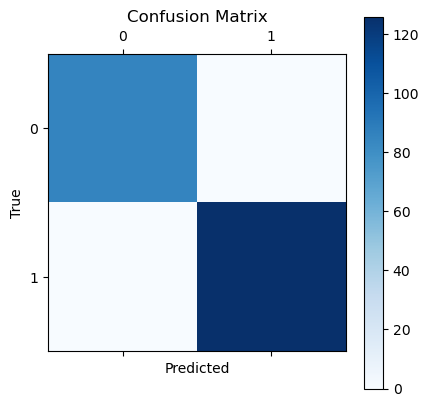

In [31]:
import pickle
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

# Load training data
with open('mnist_train.pkl', 'rb') as file:
    mnist_train = pickle.load(file)

train_images, train_labels = mnist_train

# Select only digits 0 and 1 from the training data
mask = (train_labels == 0) | (train_labels == 1)
train_images_01 = train_images[mask]
train_labels_01 = train_labels[mask]

# Normalize pixel values to be between 0 and 1
train_images_01 = train_images_01 / 255.0

# Reshape images to 2D
train_images_flat = train_images_01.reshape((train_images_01.shape[0], -1))

# Sphering the data (subtract mean, divide by standard deviation)
scaler = StandardScaler()
train_images_sphered = scaler.fit_transform(train_images_flat)

# Applying PCA with K=10
pca = PCA(n_components=10)
train_images_pca = pca.fit_transform(train_images_sphered)

# Fit Logistic Regression
logreg = LogisticRegression()
logreg.fit(train_images_pca, train_labels_01)

# Load test data
with open('mnist_test.pkl', 'rb') as file:
    mnist_test = pickle.load(file)

test_images, test_labels = mnist_test

# Select only digits 0 and 1 from the test data
mask_test = (test_labels == 0) | (test_labels == 1)
test_images_01 = test_images[mask_test]
test_labels_01 = test_labels[mask_test]

# Normalize and preprocess the test data
test_images_01 = test_images_01 / 255.0
test_images_flat = test_images_01.reshape((test_images_01.shape[0], -1))
test_images_sphered = scaler.transform(test_images_flat)  # Use the same scaler as for training data
test_images_pca = pca.transform(test_images_sphered)  # Use the same PCA as for training data

# Predict on test data
test_pred = logreg.predict(test_images_pca)

# Calculate accuracy
test_accuracy = accuracy_score(test_labels_01, test_pred)
print(f'Test accuracy: {test_accuracy:.4f}')

# Compute confusion matrix
conf_matrix = confusion_matrix(test_labels_01, test_pred)
print("Confusion matrix:")
print(conf_matrix)

# Optional: Plot confusion matrix
plt.matshow(conf_matrix, cmap='Blues')
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
